In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

# Drawing networks

__draw(G, pos=None, ax=None, hold=None, **kwds)__


Draw the graph as a __simple representation with no node labels or edge labels__ and using the full Matplotlib figure area and no axis labels by default. See draw_networkx() for more full-featured drawing that allows title, axis labels etc.

Parameters:	
- G__ (graph) – A networkx graph

- pos__ (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.layout for functions that compute node positions:
circular_layout, fruchterman_reingold_layout, random_layout, shell_layout, spectral_layout

- ax (Matplotlib Axes object, optional) – Draw the graph in specified Matplotlib axes.

- hold (bool, optional) – Set the Matplotlib hold state. If True subsequent draw commands will be added to the current axes.

- kwds (optional keywords) – See networkx.draw_networkx() for a description of optional keywords.


A better visualization method is  **draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)** (https://networkx.readthedocs.io/en/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)


# Read graphs
Many formats. We will see adjacency list, edge list, reading file line by line.

## Adjacency list

Read and write NetworkX graphs as adjacency lists. 
It is useful for graphs without data associated with nodes or edges

Adjacency list format. 
The adjacency list format consists of lines with node labels. The first label in a line is the source node. Further labels in the line are considered target nodes and are added to the graph along with an edge between the source node and target node.

NetworkX method.
**read_adjlist(path, comments='#', delimiter=None, create_using=None, nodetype=None, encoding='utf-8')**
- create_using (NetworkX graph constructor, optional (default=nx.Graph)) – Graph type to create, for example DiGraph
- nodetype (Python type, optional) – Convert nodes to this type. Since nodes must be hashable, the function nodetype must return hashable types


In [2]:
adj_graph = nx.Graph()

In [3]:
adj_graph = nx.read_adjlist('data/grafo_lista_adiacienza.txt',
                            delimiter=',',nodetype=int,
                            create_using=nx.Graph())

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


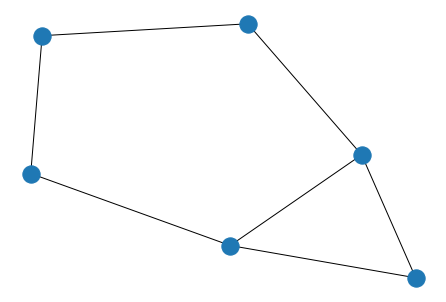

In [4]:
node_position = nx.spring_layout(adj_graph)
nx.draw(adj_graph,pos=node_position)

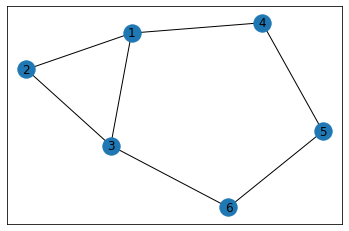

In [5]:
position_circular = nx.spring_layout(adj_graph)
nx.draw_networkx(adj_graph,pos=position_circular)

### Edge list

Read and write NetworkX graphs as edge lists.

The multi-line adjacency list format is useful for graphs with nodes that can be meaningfully represented as strings. With the edgelist format simple edge data can be stored but node or graph data is not. There is no way of representing isolated nodes unless the node has a self-loop edge.
Each line corresponds to an edge

You can read or write three formats of edge lists with these functions.

Node pairs with no data:
1 2


Python dictionary as data:
1 2 {'weight':7, 'color':'green'}


Arbitrary data:
1 2 7 green3 options:

**read_edgelist(path, comments='#', delimiter=None, create_using=None, nodetype=None, data=True, edgetype=None, encoding='utf-8')**

In [6]:
edgelist_graph = nx.read_edgelist('data/grafo_edge_list.txt',
                                  delimiter=' ', 
                                  create_using=nx.DiGraph(),
                                  nodetype=int)

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


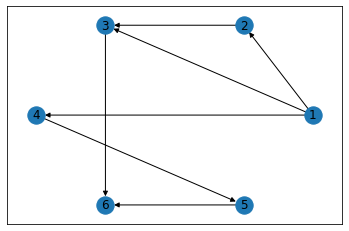

In [7]:
pos = nx.circular_layout(edgelist_graph)
nx.draw_networkx(edgelist_graph, pos)

### GEXF

**write_gexf(G, path, encoding='utf-8', prettyprint=True, version='1.1draft')**


In [8]:
nx.write_gexf(edgelist_graph,'data/edgeList4Gephi.gexf')

# Network Repository
Finora abbiamo creato i nostri piccoli grafi, tuttavia possiamo sfruttare la presenza di molti repository. __Network Repository__ è tra i più completi (http://networkrepository.com/).

Le collezioni di dataset sono categorizzate secondo il tipo di dato. Oltre alle reti sociali (online e offline) ci sono reti biologiche, brain network, reti infrastrutturali, reti tecnologiche e grafi risultanti da crawling massivi.

### 1. Ricerca di una rete
Attraverso la funzione di ricerca possiamo cercare una network inviando una stringa di query. Nel caso delle online social network è sufficiente specificarne il nome: facebook, twitter, orkut, etc ..

Iniziamo la nostra analisi da una rete piccola, ma significativa: Zachary's Karate Club. Come parole chiave utilizziamo __karate__.

La pagina relativa alla network ci fornisce la sua descrizione, la sua visualizzazione (qualora la rete sia piccola), una serie di proprietà e alcune distribuzioni.
<img src="figures/netrepo_karate.png">

Procediamo scaricando il file 'karate.zip'. Il grafo è contenuto nel file 'karate.mtx' che possiamo aprire con un qualsiasi editor testuale.

Di seguito sono state riportate le prime righe del file.<br>

%%MatrixMarket matrix coordinate pattern symmetric<br>
34 34 78<br>
2 1<br>
3 1<br>
4 1<br>
5 1<br>
6 1<br>
7 1<br>
8 1<br>
9 1<br>
11 1

Le prime due righe contengono metadati, quindi si possono saltare. Le righe rimanenti seguono il formato edge list. In questo caso dobbiamo __caricare il grafo leggendo il file testuale riga per riga__.


In [9]:
karate_graph = nx.Graph()
karate_graph_edge_list=nx.Graph()

**Esercizio**: Scrivere il codice per il caricamento del grafo utilizzando il file 'karate.mtx'

In [10]:
# readlines() is used to read all the lines at a single go and then return them as each line a string element in a list. 
# This function can be used for small files, as it reads the whole file content to the memory, then split it into separate lines. 
# We can iterate over the list and strip the newline '\n' character using strip() function.

with open('data/karate.mtx') as f:
    f.readline()
    f.readline()
    for line in f:
        source, destination = line.strip().split(' ') #tuple
        karate_graph.add_edge(source,destination)

In questo caso apro e chiudo esplicitamente l'oggetto file.

Per verificare il corretto caricamento del grafo, contiamo il __numero dei nodi e degli archi__ utilizzando i metodi **order()** e **size()**

In [11]:
# oppure modifichiamo il file cancellando le linee con i metadati
karate_graph_edge_list=nx.read_edgelist('data/karate_edge_list.txt')

In [12]:
print('Numero di nodi: {} - numero di archi:{}'.format(karate_graph.order(),karate_graph.size()))
print('Numero di nodi: {} - numero di archi:{}'.format(karate_graph_edge_list.order(),karate_graph_edge_list.size()))

Numero di nodi: 34 - numero di archi:78
Numero di nodi: 34 - numero di archi:78


**Esercizio**: Visualizzare la rete dello Zachary Club

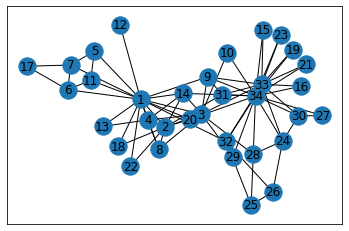

In [13]:
posizione = nx.spring_layout(karate_graph)
nx.draw_networkx(karate_graph,pos=posizione)

## Analysis of the degree
Una volta caricato il grafo in memoria una delle proprietà che solitamente si analizzano è la __distribuzione del grado__, una delle misure di centralità in una network. Dal momento che il karate graph non è orientato, per ora non distinguiamo tra grado in ingresso (in-degree) e grado in uscita (out-degree).

In NetworkX il metodo __degree()__ calcola il grado di ogni nodo e ne restituisce la view. Passando la vista al costruttore dict() ottengo un dictionary con chiave id del nodo e valore il grado del corrispettivo nodo.

In [14]:
karate_degree_view=karate_graph.degree()
print(type(karate_degree_view))
print(karate_degree_view)

karate_degree_dict=dict(karate_graph.degree())
print('\n',type(karate_degree_dict))
print(karate_degree_dict)
print('elemento in posizione 2 della lista: ', karate_degree_dict['2'])

karate_degree_list=list(karate_graph.degree())
print('\n',type(karate_degree_list))
print(karate_degree_list)
print('elemento in posizione 2 della lista: ',karate_degree_list[2])

karate_degree=list(dict(karate_graph.degree()).values())
print('\n',type(karate_degree))
print(karate_degree)


<class 'networkx.classes.reportviews.DegreeView'>
[('2', 9), ('1', 16), ('3', 10), ('4', 6), ('5', 3), ('6', 4), ('7', 4), ('8', 4), ('9', 5), ('11', 3), ('12', 1), ('13', 2), ('14', 5), ('18', 2), ('20', 3), ('22', 2), ('32', 6), ('31', 4), ('10', 2), ('28', 4), ('29', 3), ('33', 12), ('17', 2), ('34', 17), ('15', 2), ('16', 2), ('19', 2), ('21', 2), ('23', 2), ('26', 3), ('24', 5), ('30', 4), ('25', 3), ('27', 2)]

 <class 'dict'>
{'2': 9, '1': 16, '3': 10, '4': 6, '5': 3, '6': 4, '7': 4, '8': 4, '9': 5, '11': 3, '12': 1, '13': 2, '14': 5, '18': 2, '20': 3, '22': 2, '32': 6, '31': 4, '10': 2, '28': 4, '29': 3, '33': 12, '17': 2, '34': 17, '15': 2, '16': 2, '19': 2, '21': 2, '23': 2, '26': 3, '24': 5, '30': 4, '25': 3, '27': 2}
elemento in posizione 2 della lista:  9

 <class 'list'>
[('2', 9), ('1', 16), ('3', 10), ('4', 6), ('5', 3), ('6', 4), ('7', 4), ('8', 4), ('9', 5), ('11', 3), ('12', 1), ('13', 2), ('14', 5), ('18', 2), ('20', 3), ('22', 2), ('32', 6), ('31', 4), ('10', 2), (

Per farmi restuire il grado di un singolo nodo ho le seguenti opzioni ...

In [15]:
karate_graph.degree()['34']

17

In [16]:
karate_graph.degree('34')

17

In [17]:
len(list(karate_graph.neighbors('34')))

17

Il secondo metodo mi permette di ottenere il grado data un lista di nodi. Ciò è molto utile per ottenere il grado di un sottoinsieme di nodi.

In [18]:
dict(karate_graph.degree(['34','22','1','10']))

{'34': 17, '22': 2, '1': 16, '10': 2}

#### Degree: mean, median, standard deviation, min and max

In [19]:
print(np.mean(karate_degree))
print(np.median(karate_degree)) 
print(np.std(karate_degree))
print(np.max(karate_degree))
print(np.min(karate_degree))

4.588235294117647
3.0
3.820360677912828
17
1


## ECDF and ECCDF
Use the ECDF object of the module statsmodel. It returns a CDF starting from the given sample

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF

# matplotlib.org 
a comprehensive library for creating static, animated, and interactive visualizations in Python.

Text(0, 0.5, 'ECCDF')

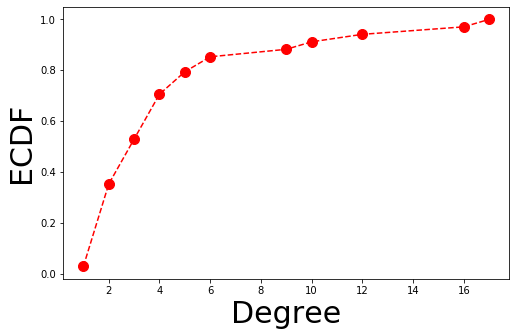

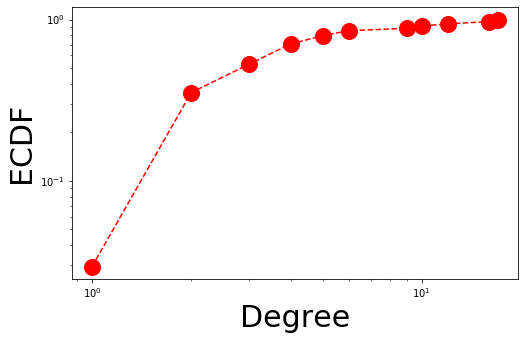

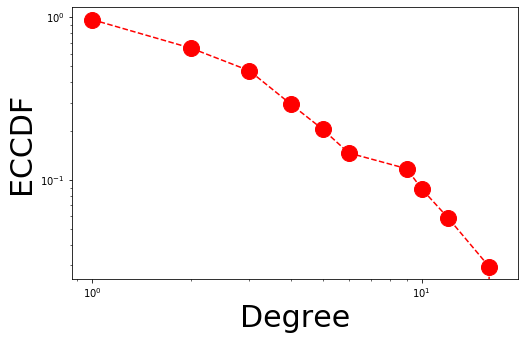

In [21]:
# ECDF in linear scale
cdf_function = ECDF(karate_degree)
x = np.unique(karate_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,5)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)

# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)

# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECCDF',size = 30)


## Identificare gli hub
Infine vogliamo identificare quali sono i nodi con più alto grado.

Il primo passo è definire una soglia per quantificare cosa intendiamo per 'alto grado'. Per questo possiamo utilizzare la CDF. In particolare fissato una $q \in [0,1]$ vogliamo trovare il valore del grado $k$ tale che $F_X(k)=q$. Questa operazione corrisponde alla definizione di _quantile_.

In Python posso calcolare i quantili utilizzando la funzione di Numpy **percentile**. In particolare fissiamo $q=0.95$

In [22]:
percentile_95 = np.percentile(karate_degree,95)
print(percentile_95)

13.399999999999991


Ciò indica che il 95% dei nodi ha grado minore di quantile_95.

Ora estraggo quali sono i nodi hub utilzzando la list comprehension

In [23]:
hub_nodi = [k for k,v in dict(karate_graph.degree()).items() if v>= percentile_95]
print(hub_nodi)

['1', '34']


# Random networks: the Erdos-Renyi model


#### erdos_renyi_graph(n, p, seed=None, directed=False)


Returns a G(n,p) random graph, also known as an Erdős-Rényi graph or a binomial graph.

The G(n,p) model chooses each of the possible edges with probability p.

The functions binomial_graph() and erdos_renyi_graph() are aliases of this function.

Parameters:
- n (int) – The number of nodes.

- p (float) – Probability for edge creation.

- seed (integer, random_state, or None (default)) – Indicator of random number generation state. See Randomness.

- directed (bool, optional (default=False)) – If True, this function returns a directed graph.

#### gnp_random_graph()

#### fast_gnp_random_graph()

it is a faster algortihm for sparse networks

In [24]:
mean_degree_karate = np.mean(karate_degree)

Dal momento che
$$ <k> = p (N-1)$$
posso ottenere $p = \frac{<k>}{N-1}$, dove N è il numero di nodi del grafo.

Nel nostro caso ...

In [25]:
p = mean_degree_karate / (karate_graph.order()-1)

In [26]:
random_graph = nx.fast_gnp_random_graph(karate_graph.order(),p)

In [27]:
print('Numero nodi: {}'.format(random_graph.order()))
print('Numero archi: {}'.format(random_graph.size()))

Numero nodi: 34
Numero archi: 69


In [28]:
random_degree = list(dict(random_graph.degree()).values())

Text(0, 0.5, 'ECCDF')

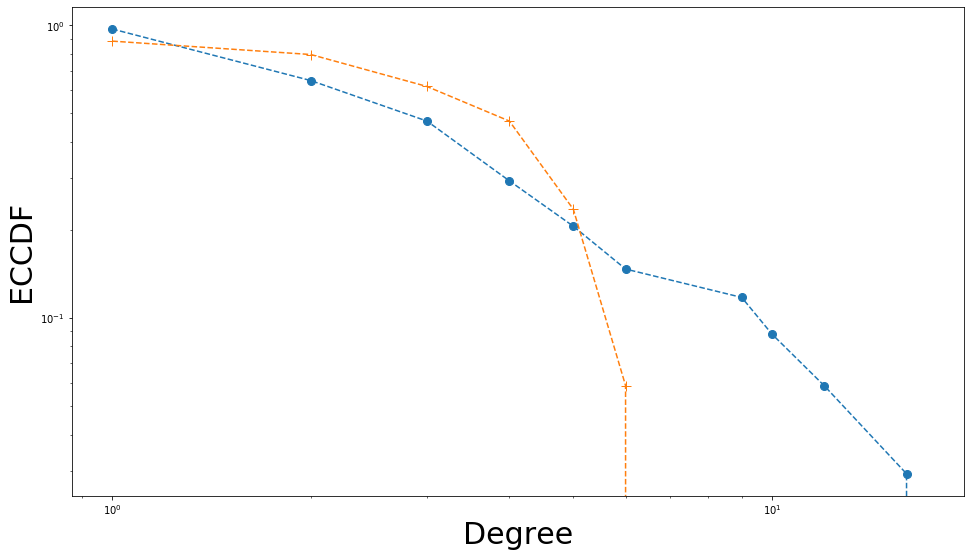

In [29]:
cdf_karate = ECDF(karate_degree)
x_karate = np.unique(karate_degree)
y_karate = cdf_karate(x_karate)
cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)
fig_cdf_karate = plt.figure(figsize=(16,9))
assi = fig_cdf_karate.gca()
assi.set_xscale('log')
assi.set_yscale('log')
#assi.loglog(x_karate,1-y_karate,marker='o',ms=8, linestyle='--')
assi.loglog(x_karate,1-y_karate,marker='o',ms=8, linestyle='--')
assi.plot(x_random,1-y_random,marker='+',ms=10, linestyle='--')
assi.set_xlabel('Degree',size=30)
assi.set_ylabel('ECCDF', size = 30)


In [31]:
percentile_95 = np.percentile(karate_degree, 95.00)
print(percentile_95)

13.399999999999991


In [34]:
hub_nodi = [k for k,v in dict(karate_graph.degree()).items() if v>= percentile_95]

In [35]:
print(len(hub_nodi))
print(list(hub_nodi))

2
['1', '34']


In [36]:
print(nx.is_connected(karate_graph))

True


In [37]:
print(nx.number_connected_components(karate_graph))
print(nx.overall_reciprocity(karate_graph))

1
0.0


In [39]:
#transitivity
transitivity=nx.transitivity(karate_graph)
print(transitivity)


0.2556818181818182


In [40]:
print(list(nx.isolates(karate_graph)))

[]
